In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

## I. Smoke remove edges test

Line does not intersect with the circle
Line2 intersects with the circle


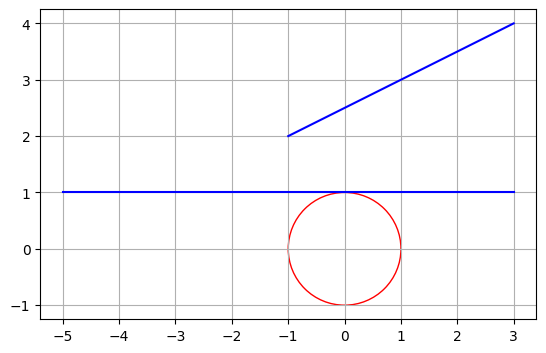

In [5]:
def line_circle_intersection(line_start, line_end, circle_center, circle_radius):
    # Direction vector of the line
    line_dir = line_end - line_start
    
    # Vector from the start point of the line to the circle center
    to_center = circle_center - line_start
    
    # Projecting to_center onto line_dir
    projection_length = np.dot(to_center, line_dir) / np.dot(line_dir, line_dir)
    
    # Finding the closest point on the line to the circle center
    closest_point = line_start + projection_length * line_dir
    
    # Distance between the closest point and the circle center
    distance = np.linalg.norm(closest_point - circle_center)
    
    # If the distance is less than or equal to the radius, they intersect
    return distance <= circle_radius

# Circle parameters
circle_center = np.array([0, 0])
circle_radius = 1.0

# Line parameters
line_start = np.array([-1, 2])
line_end = np.array([3, 4])

line2_start = np.array([-5, 1])
line2_end = np.array([3, 1])

# Create plot
fig, ax = plt.subplots()

# Draw circle
circle = Circle(circle_center, circle_radius, fill=False, color='r')
ax.add_patch(circle)

# Draw line
ax.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], color='b')
ax.plot([line2_start[0], line2_end[0]], [line2_start[1], line2_end[1]], color='b')

# Check intersection
if line_circle_intersection(line_start, line_end, circle_center, circle_radius):
    print("Line intersects with the circle")
else:
    print("Line does not intersect with the circle")

# Check intersection
if line_circle_intersection(line2_start, line2_end, circle_center, circle_radius):
    print("Line2 intersects with the circle")
else:
    print("Line2 does not intersect with the circle")

# Set plot aspect ratio to be equal
ax.set_aspect('equal', adjustable='box')


# Show plot
plt.grid(True)
plt.show()


## II. Add statistics to playerFrames speedup attempt

In [16]:
array1 = [[10, 'niko', 12, 13],
          [14, 's1mple', 16, 17],
          [18, 'donk', 20, 21],
          [22, 'jkl', 24, 25]]

array2 = [[6,  0, 'niko'],
          [11, 0, 's1mple'],
          [15, 0, 'donk'],
          [40, 0, 'jkl'],
          [50, 0, 'niko']]

df1 = pd.DataFrame(array1, columns=['tick', 'name', 'kills', 'deaths'])
df2 = pd.DataFrame(array2, columns=['tick', 'killsum', 'name'])

pd.merge(df1, df2, on='name', how='outer')

,tick_x,name,kills,deaths,tick_y,killsum
0,10,niko,12,13,6,0
1,10,niko,12,13,50,0
2,14,s1mple,16,17,11,0
3,18,donk,20,21,15,0
4,22,jkl,24,25,40,0
